In [45]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the digits dataset
digits = load_digits()

# The data contains the feature vectors (images of digits)
X = digits.data

# The target contains the corresponding labels (the actual digits)
y = digits.target

In [46]:
# Setup a DataFrame
digits_df = pd.DataFrame(data=X, columns=digits.feature_names)
digits_df['target'] = y

# Take a look at the data structure
print(digits.data.shape)

(1797, 64)


In [47]:
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [48]:
digits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Initialize the SVC classifier
classifier = SVC()

In [51]:
# Train the classifier on the training data
classifier.fit(X_train, y_train)

SVC()

In [52]:
# Make predictions on the test data
y_pred = classifier.predict(X_test)

In [53]:
# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9861111111111112


In [54]:
# Display a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



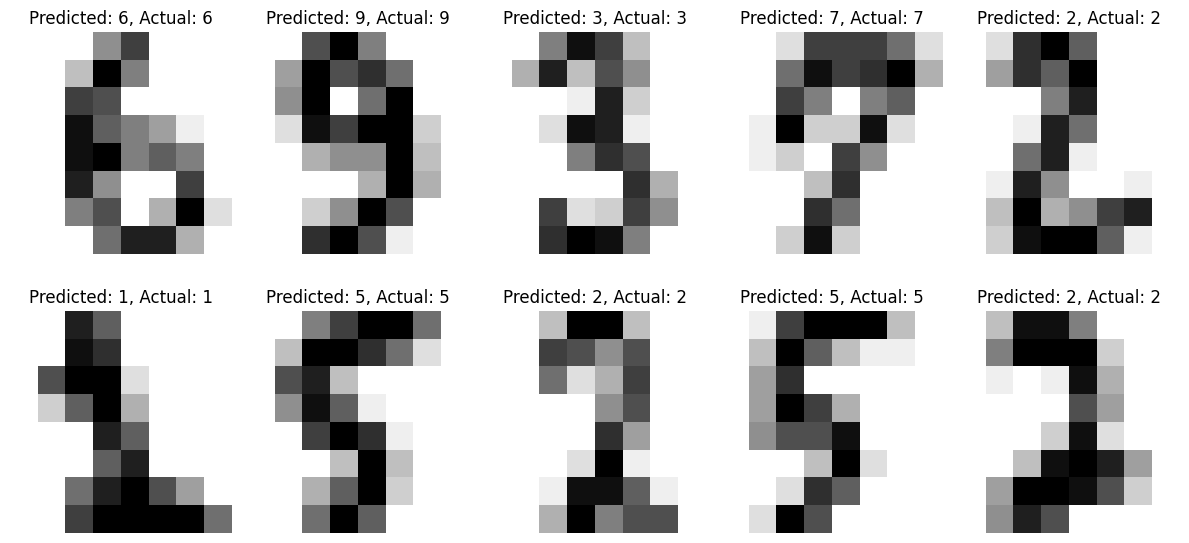

In [55]:
# Visualize the first 10 digits along with their predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [56]:
# Create a DataFrame to store the predictions and actual labels
data = {'Actual Label': y_test, 'Predicted Label': y_pred}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('digits_predictions.csv', index=False)

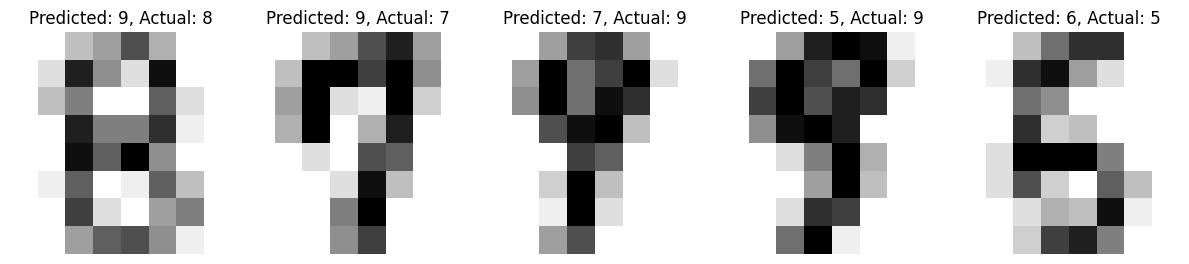

In [57]:
# Find the indices where the predictions are incorrect
incorrect_indices = [i for i in range(len(y_test)) if y_test[i] != y_pred[i]]

# Visualize the digits with incorrect predictions
plt.figure(figsize=(12, 6))
for idx, i in enumerate(incorrect_indices[:10]):  # Display the first 10 errors
    plt.subplot(2, 5, idx + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()